In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# to fill the missing age values with its mean based on PClass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [6]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

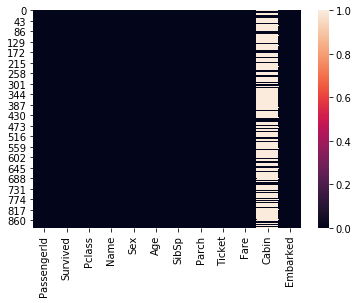

In [8]:
# to check how much missing values values we have 
sns.heatmap(train_data.isnull())

In [9]:
train_data = train_data.drop(["Cabin"], 1)

In [10]:
#  to convert categorical values to nummerical values
train_sex = pd.get_dummies(train_data["Sex"],drop_first=True)
train_embark = pd.get_dummies(train_data['Embarked'],drop_first=True)

In [11]:
train_data = pd.concat([train_data,train_sex, train_embark],axis=1)

In [12]:
train_data = train_data.drop(["Name", "Sex", "Ticket","Embarked"], 1)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, train_test_split

In [14]:
reg = LogisticRegression()

In [15]:
X = train_data.drop(["Survived"], 1)

# to scale the features
X = preprocessing.scale(X)

y = train_data["Survived"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.468, random_state=42)

In [16]:
reg.fit(X_train,y_train)

LogisticRegression()

In [17]:
predict = reg.predict(X_test)

In [18]:
# to check the accuracy of our trained data
reg.score(X_test, y_test)

0.8033573141486811

### For the prediction

In [19]:
test_data = pd.read_csv("test.csv")
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age,axis=1)
test_embark = pd.get_dummies(test_data['Embarked'],drop_first=True)
test_sex = pd.get_dummies(test_data["Sex"],drop_first=True)
test_data = pd.concat([test_data,test_sex,test_embark],axis=1)

In [20]:
test_data = test_data.drop(["Name", "Sex", "Ticket","Embarked","Cabin"], 1)

In [21]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [22]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
male           0
Q              0
S              0
dtype: int64

In [23]:
# to fill in the missing values of Fare
test_data["Fare"] = test_data["Fare"].fillna(np.mean(test_data["Fare"]))

In [24]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [25]:
test_data =preprocessing.scale(test_data)

In [26]:
prediction = reg.predict(test_data)


In [27]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,